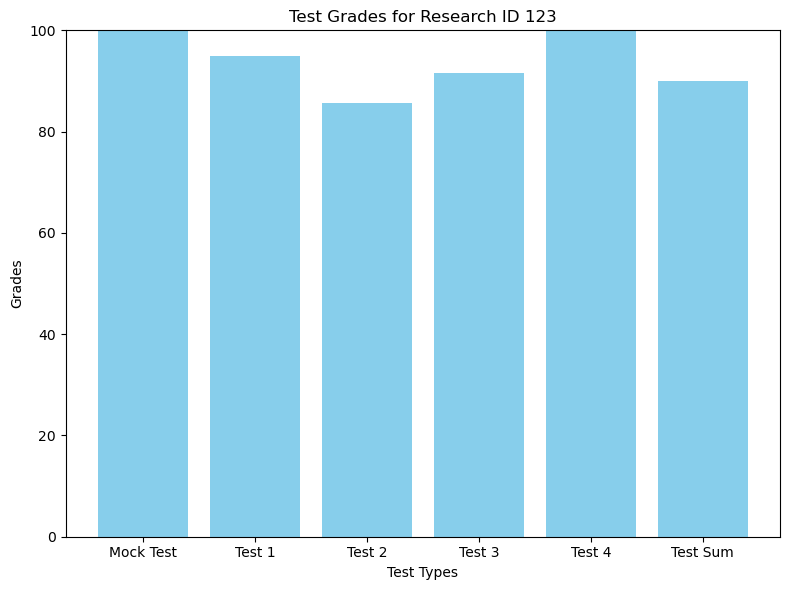

In [5]:
import ipywidgets as widgets
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Create the main menu options
dropdown = widgets.Dropdown(
    options=["UnderPerforming_Students", "StudentPerformance", "HardWorking_Students", "TestResults"],
    value=None,
    description="Select a function:",
)

student_id = int(input("Enter Research ID: "))
test_name = input("Enter test name: ")
path = 'C:/Users/user/OneDrive/Desktop/23COP504_CW/Data Files/Resultdatabase.db'

global student_id, test_name, path

# ----------------------- UnderPerforming Students -------------------------------#

def get_underperforming_students(path):
    
    # Connect to database
    connection = sqlite3.connect(path)
    cursor = connection.cursor()
    query = """
    SELECT a.research_id, a.Grade as Mock_Test_Grade, \
    b.Grade as Test_1_Grade, c.Grade as Test_2_Grade, \
    d.Grade as Test_3_Grade, e.Grade as Test_4_Grade, \
    f.Grade as Test_Sum_Grade 
    FROM Test_Mock AS a
    INNER JOIN Test_1 AS b 
    ON a.research_id = b.research_id
    INNER JOIN Test_2 AS c
    ON a.research_id = c.research_id
    INNER JOIN Test_3 AS d
    ON a.research_id = d.research_id
    INNER JOIN Test_4 AS e
    ON a.research_id = e.research_id
    INNER JOIN Test_Sum AS f
    ON a.research_id = f.research_id;
    """

    cursor.execute(query)
    data = cursor.fetchall()
    connection.close()  # Terminate database connection
    
    for research_id, Test_Sum_Grade, *Test_Grade in data:
        lowest_formative_grade = min(Test_Grade)

        # Check if all grades (summative and formative) are within the 1-50 range:
        is_underperforming = (
            1 <= Test_Sum_Grade <= 50
            or any(1 <= grade <= 50 for grade in Test_Grade)
        )
        if is_underperforming:
            Classification = 'Underperforming'
        else:
            Classification = 'Performing'

        print(f"Research_Id: {research_id}")
        print(f"Summative Test Grade: {Test_Sum_Grade}")
        for test_name, grade in zip(['Mock_Test_Grade', 'Test_1_Grade', 'Test_2_Grade', 'Test_3_Grade', 'Test_4_Grade'], Test_Grade):
            highlight = '\033[1m' if grade == lowest_formative_grade else ''
            print(f"{test_name}: {highlight}{grade}\033[0m")
        print(f"Student Performance: {Classification}")
        print("-" * 25) 

# ----------------------- Student Performance -------------------------------#     

def student_grade(student_id, test_name):
    path = 'C:/Users/user/OneDrive/Desktop/23COP504_CW/Data Files/Resultdatabase.db'
    connection = sqlite3.connect(path)
    cursor = connection.cursor()
    
    if test_name == 'Test_Mock':    
        query = f"""
        SELECT research_id, grade,
        Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10
        FROM Test_Mock
        WHERE research_id = {student_id};
        """   
    elif test_name == 'Test_1':
        query = f"""
        SELECT research_id, grade,
        Q1, Q2, Q3, Q4, Q5, Q6
        FROM Test_1
        WHERE research_id = {student_id};
        """    
    elif test_name == 'Test_2':
        query = f"""
        SELECT research_id, grade,
        Q1, Q2, Q3, Q4, Q5, Q6
        FROM Test_2
        WHERE research_id = {student_id};
        """    
    elif test_name == 'Test_3':
        query = f"""
        SELECT research_id, grade,
        Q1, Q2, Q3, Q4, Q5, Q6
        FROM Test_3
        WHERE research_id = {student_id};
        """
    elif test_name == 'Test_4':
        query = f"""
        SELECT research_id, grade,
        Q1, Q2
        FROM Test_4
        WHERE research_id = {student_id};
        """
    elif test_name == 'Test_Sum':
        query = f"""
        SELECT research_id, grade,
        Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10, Q11, Q12, Q13
        FROM Test_Sum
        WHERE research_id = {student_id};
        """
        
    cursor.execute(query)
    data = cursor.fetchall()
    connection.close()
    return data

def test_average(test_name):
    path = 'C:/Users/user/OneDrive/Desktop/23COP504_CW/Data Files/Resultdatabase.db'
    connection = sqlite3.connect(path)
    cursor = connection.cursor()
    
    if test_name == 'Test_Mock':    
        query = """
        SELECT research_id, grade,
        Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10
        FROM Test_Mock;
        """    
    elif test_name == 'Test_1':
        query = """
        SELECT research_id, grade,
        Q1, Q2, Q3, Q4, Q5, Q6
        FROM Test_1;
        """
    elif test_name == 'Test_2':
        query = """
        SELECT research_id, grade,
        Q1, Q2, Q3, Q4, Q5, Q6
        FROM Test_2;
        """    
    elif test_name == 'Test_3':
        query = """
        SELECT research_id, grade,
        Q1, Q2, Q3, Q4, Q5, Q6
        FROM Test_3;
        """    
    elif test_name == 'Test_4':
        query = """
        SELECT research_id, grade,
        Q1, Q2
        FROM Test_4;
        """    
    elif test_name == 'Test_Sum':
        query = """
        SELECT research_id, grade,
        Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10, Q11, Q12, Q13
        FROM Test_Sum;
        """
    
    cursor.execute(query)
    data = cursor.fetchall()
    grades = [i[1] for i in data]
    average = round(sum(grades) / len(grades), 2)
    connection.close()
    return average

def calculate_performance(data, average):
    student_grades = [row[2:] for row in data]
    student_grades = np.array(student_grades).flatten()
    absolute_performance = student_grades / max(student_grades) * 100
    relative_performance = student_grades - average
    return absolute_performance, relative_performance

def visualize_performance(absolute_performance, relative_performance):
    question_labels = [f"Q{i+1}" for i in range(len(absolute_performance))]
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.bar(question_labels, absolute_performance, color='lightblue')
    plt.title("Absolute Performance (Percentage)")
    plt.xlabel("Questions")
    plt.ylabel("Grade (%)")

    plt.subplot(1, 2, 2)
    plt.bar(question_labels, relative_performance, color='lightgreen')
    plt.title("Relative Performance (Difference from Average)")
    plt.xlabel("Questions")
    plt.ylabel("Difference")

    plt.tight_layout()
    plt.show()

# ----------------------- Hardworking Students -------------------------------#

class HardworkingStudentFinder:
    
    def __init__(self, test_database):
        self.test_database = test_database
        self.test_database = self.load_database()
        
    def load_database(self):
        connection = sqlite3.connect(path)
        cursor = connection.cursor()
        query = """SELECT a.research_id, a.Grade as Test_Sum_Grade, \
            b.Your_programming_knowledge_level  
            FROM Test_Sum AS a
            INNER JOIN Student_Rate AS b 
            ON a.research_id = b.research_id;"""

        cursor.execute(query)
        data = cursor.fetchall()
        return data
    
    def display_data(self, load_database):
        for research_id, Test_Sum_Grade, Your_programming_knowledge_level in load_database:
            if Test_Sum_Grade > 60:
                if Your_programming_knowledge_level in ('Below Beginner', 'Beginner'):
                    Classification = 'Hardworking'
                else:
                    Classification = 'Not Hardworking'
            else:
                Classification = 'Not Hardworking'
            
            print(f"Student ID: {research_id}")
            print(f"Summative Test Grade: {Test_Sum_Grade}")
            print(f"Programming Knowledge Rating: {Your_programming_knowledge_level}")
            print(f"Student Classification: {Classification}")
            print("---------------")

# ----------------------- Test Results -------------------------------#

class test_results:

    def __init__(self, test_database):
        self.test_database = test_database
        self.test_database = self.load_database()
        
    def load_database(self):
        connection = sqlite3.connect(path)
        cursor = connection.cursor()
        query = """
        SELECT a.research_id, a.Grade as Mock_Test_Grade, \
        b.Grade as Test_1_Grade, c.Grade as Test_2_Grade, \
        d.Grade as Test_3_Grade, e.Grade as Test_4_Grade, \
        f.Grade as Test_Sum_Grade 
        FROM Test_Mock AS a
        INNER JOIN Test_1 AS b 
        ON a.research_id = b.research_id
        INNER JOIN Test_2 AS c
        ON a.research_id = c.research_id
        INNER JOIN Test_3 AS d
        ON a.research_id = d.research_id
        INNER JOIN Test_4 AS e
        ON a.research_id = e.research_id
        INNER JOIN Test_Sum AS f
        ON a.research_id = f.research_id;
        """

        cursor.execute(query)
        data = cursor.fetchall()
        connection.close()  # Terminate database connection
        return data
        
    def display_test_grades(self, load_database):
        matching_tuple = None
        for score in load_database:
            if score[0] == student_id:
                matching_tuple = score[1:]
                break   # Exit the loop once the match is found

        if not matching_tuple:
            print("Research ID not found")

        # Plot the grades
        test_names = ['Mock Test', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test Sum']
        grades_to_plot = matching_tuple

        plt.figure(figsize=(8, 6))
        plt.bar(test_names, grades_to_plot, color='skyblue')
        plt.xlabel('Test Types')
        plt.ylabel('Grades')
        plt.title(f'Test Grades for Research ID {student_id}')
        plt.ylim(0, 100)
        plt.tight_layout()
        plt.show()

# ----------------------- Function Selection -------------------------------#

# Link function calls to dropdown selection

def on_button_click(change):
    selected_function = dropdown.value
    clear_output()
    
    if selected_function == "UnderPerforming_Students":
        get_underperforming_students(path)
        
    elif selected_function == "StudentPerformance":
        data = student_grade(student_id, test_name)
        average = test_average(test_name)    
        absolute_performance, relative_performance = calculate_performance(data, average)
        visualize_performance(absolute_performance, relative_performance)
        
    elif selected_function == "HardWorking_Students":
        finder = HardworkingStudentFinder(path)
        hardworking_students = finder.load_database()
        finder.display_data(hardworking_students)
        
    elif selected_function == "TestResults":
        display_grades = test_results(path)
        get_data = display_grades.load_database()
        display_grades.display_test_grades(get_data)
        
# Create a button to trigger the function executions
button = widgets.Button(description="Run Selected Function")
button.on_click(on_button_click)

# Display the menu elements
widgets.VBox([dropdown, button])